#### The code below fits a negative temperature resistance coefficient thermistor, like the TH40004-4 you have used. The result is that, the measured resistance - temperature 'direct' calibration curve can be obtained. The temperature is varied independently and is measured with a thermometer. The corresponding dependent resistance of a thermistor is measured. We will plot 1/T on the y-axis and R on the x-axis. The codes can also calculate the inverse calibration, i.e., determine the resistance if the measured temperature is input.

### Direct Calibration

parameters A, B and C from curve fit [1.46800241e-03 2.38299445e-04 1.00704186e-07]
covariance matrix from curve fit [[ 2.96863966e-18 -6.45625058e-19  4.17010911e-21]
 [-6.45625058e-19  1.41377107e-19 -9.23070373e-22]
 [ 4.17010911e-21 -9.23070373e-22  6.15282422e-24]]
standard deviations in the coefficients A, B and C [1.72297407e-09 3.76001472e-10 2.48048871e-12]


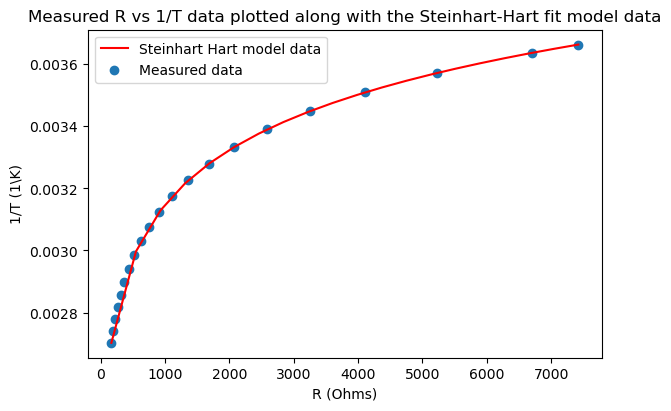

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
columns = ["R", "T_inv"]
Tdata_in = pd.read_excel('thermistor_data.xlsx', usecols=columns)#read excel xlxs file into a Pandas dataframe named Tdata_in
xdata = Tdata_in["R"]#dependent variable R
ydata = Tdata_in["T_inv"]#independent variable 1/T
#define the direct calibration equation as a function funcD
def funcD(R, A, B, C):#Steinhart-Hart model fit
    return A + (B*np.log(R))+(C*(np.log(R))**3)

popt, pcov = curve_fit(funcD, xdata, ydata, p0=[1,1,1])#initial guess for A, B and C provided
print("parameters A, B and C from curve fit", popt)
print("covariance matrix from curve fit", pcov)
p_sigma = np.sqrt(np.diag(pcov))
print("standard deviations in the coefficients A, B and C", p_sigma)
Aopt,Bopt,Copt = popt #pickout the optimal parameters
#plot the model data and the measured data
x_model = np.linspace(min(xdata), max(xdata), 20)
y_model = funcD(x_model, Aopt, Bopt, Copt)
fig, ax = plt.subplots(figsize=(6,4), layout = 'constrained')
linesx = ax.plot(x_model, y_model, color = 'r', label = "Steinhart Hart model data")
plt.scatter(xdata, ydata, label = 'Measured data')
plt.legend()
plt.xlabel("R (Ohms)")
plt.ylabel("1/T (1\K)")
plt.title("Measured R vs 1/T data plotted along with the Steinhart-Hart fit model data")
plt.show()

### Plot R vs T

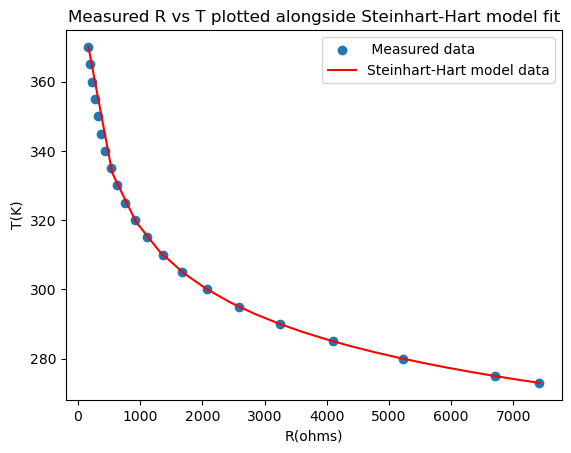

In [24]:
ydata = 1/ydata#convert measured 1/T to T in K
y_model = 1/y_model#convert model 1/T to T in K
plt.scatter(xdata, ydata, label = ' Measured data')
plt.plot(x_model, y_model, color ='r', label = 'Steinhart-Hart model data')
plt.legend()
plt.xlabel("R(ohms)")
plt.ylabel("T(K)")
plt.title("Measured R vs T plotted alongside Steinhart-Hart model fit")
plt.show()

### Inverse Calibration to calculate R given T using A, B and C determined from Steinhart-Hart fit

#### Check the resistance value at five selected temperatures in the range 273 K to 373 K. Input the temperature in K individually and report the resistance in ohms in the form of a table. A sample value at 293 K is reported below.

In [29]:
T = 293 #enter a temperature in K
alpha = (1/Copt)*(Aopt-(1/T))
beta = np.sqrt((Bopt/(3*Copt))**3+((alpha**2)/4))
R=np.exp((beta-(alpha/2))**(1/3)-(beta+(alpha/2))**(1/3))
print("T=", T, "K","R=", R, "Ohms")

T= 293 K R= 2834.3245480366836 Ohms
